# Exploratory Data Analysis

In this notebook, we will
- set up the Colab runtime environment
- mount our Google Drive to access jute data
- download Plant Village data
- *etc

## 1. Environment Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
from pathlib import Path

project_root = Path("../../").resolve()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

Failed to read module file 'C:\Users\umali\AppData\Roaming\uv\python\cpython-3.11.14-windows-x86_64-none\Lib\functools.py' for module 'functools': UnicodeDecodeError
Traceback (most recent call last):
  File "c:\Users\umali\GithubProjects\jute-disease-detection\.venv\Lib\site-packages\IPython\core\extensions.py", line 62, in load_extension
    return self._load_extension(module_str)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\umali\GithubProjects\jute-disease-detection\.venv\Lib\site-packages\IPython\core\extensions.py", line 77, in _load_extension
    mod = import_module(module_str)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\umali\AppData\Roaming\uv\python\cpython-3.11.14-windows-x86_64-none\Lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen import

In [ ]:
import os

from pathlib import Path
from PIL import Image
from tqdm import tqdm
import random
from EDA import EDA

from torchvision.datasets import ImageFolder

from jute_disease_pest.utils.constants import BY_CLASS_DIR, DATA_DIR, DEFAULT_SEED
from jute_disease_pest.utils.logger import get_logger
from src.jute_disease_pest.utils.data import download_plant_village
from src.jute_disease_pest.utils.seed import seed_everything

In [3]:
logger = get_logger(__name__)
seed_everything(DEFAULT_SEED)

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

2026-02-17 09:09:02,085 - src.jute_disease_pest.utils.seed - INFO - Random seed set to: 42


## 2. Prepare Datasets

Steps
1. Download https://drive.google.com/file/d/1_-vtn6NtShoOiPRk3flL--buVRYGxdAX/view?usp=sharing and upload `data.zip` file to your Google Colab account's Google Drive. You can simply upload it to the root of _My Drive_ for simplicity.
2. Update `DATA_ZIP_PATH` below to the path where you stored the file. If you uploaded it to the root of _My Drive_, you can set it to **"/content/drive/MyDrive/data.zip"**.

In [ ]:
# NOTE:
# Update this to where you stored data.zip in your GDrive.
# For organization, the authors stored theirs in
# "/content/drive/MyDrive/Colab/jute_disease_pest/data.zip"
DATA_ZIP_PATH = "/content/drive/MyDrive/data.zip"

if os.path.exists(DATA_ZIP_PATH):
    logger.info(f"Unzipping {DATA_ZIP_PATH}...")
    !unzip -q -n "$DATA_ZIP_PATH" -d .
    logger.info("Data unpacked.")
else:
    logger.warning(
        f"Zip file not found at {DATA_ZIP_PATH}. "
        "Please check the path or upload your data."
    )

Let us also download the _Plant Village_ dataset from Kaggle. We already created a script to download it and consolidate it to `data/plant_village` for organization.

In [36]:
download_plant_village()

2026-02-17 12:38:44,714 - src.jute_disease_pest.utils.data - INFO - Downloading PlantVillage dataset...
Resuming download from 298844160 bytes (558506939 bytes left)...
Resuming download to C:\Users\umali\.cache\kagglehub\datasets\mohitsingh1804\plantvillage\1.archive (298844160/857351099) bytes left.


100%|██████████| 818M/818M [00:23<00:00, 23.4MB/s]

Extracting files...


2026-02-17 12:41:18,265 - src.jute_disease_pest.utils.data - INFO - Downloaded to C:\Users\umali\.cache\kagglehub\datasets\mohitsingh1804\plantvillage\versions\1
2026-02-17 12:41:18,269 - src.jute_disease_pest.utils.data - INFO - Preparing PlantVillage dataset in C:\Users\umali\GithubProjects\jute-disease-detection\data\plant_village...


Processing val: 100%|██████████| 38/38 [04:53<00:00,  7.73s/it]

2026-02-17 13:04:21,428 - src.jute_disease_pest.utils.data - INFO - PlantVillage preparation complete!


At this point, we have downloaded and prepared two datasets:
1. **PlantVillage**: a general dataset of diseased leaf images 
2. our curated Jute leaf disease and pest dataset compiled from different sources

We will be using PlantVillage for multistage transfer learning and our curated dataset for fine-tuning. Our end goal is to train a model that performs excellently on our curated Jute leaf disease and pest dataset.

In [37]:
jute_dataset = ImageFolder(root=BY_CLASS_DIR)
logger.info(f"Jute Dataset ({BY_CLASS_DIR}):")
logger.info(f"  - Total Images: {len(jute_dataset)}")
logger.info(f"  - Classes: {len(jute_dataset.classes)}")

plant_village_dir = DATA_DIR / "plant_village"
if plant_village_dir.exists():
    pv_dataset = ImageFolder(root=plant_village_dir)
    logger.info(f"\nPlantVillage Dataset ({plant_village_dir}):")
    logger.info(f"  - Total Images: {len(pv_dataset)}")
    logger.info(f"  - Classes: {len(pv_dataset.classes)}")
else:
    logger.warning("\nPlantVillage dataset not found! Check download step.")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\umali\\GithubProjects\\jute-disease-detection\\data\\by_class'

# Exploratory Data Analysis


In [34]:
data_path1 = Path(r"D:\DLSU Files\Term 8\002 CSC713M - Machine Learning\Projects\Jute Disease Dataset\Jute Diesease Dataset")
# data_path2 = Path(r"D:\DLSU Files\Term 8\002 CSC713M - Machine Learning\Projects\Jute Plant Leaves\Jute Plant Leaves")
data_path3 = Path(r"D:\DLSU Files\Term 8\002 CSC713M - Machine Learning\Projects\insect_data_all-20260217T011745Z-1-001\insect_data_all\train")


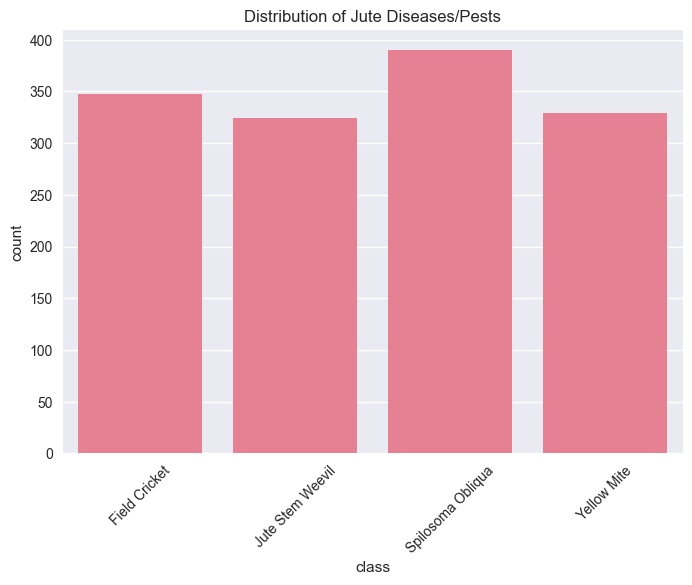

In [35]:
EDA.get_class_distribution(data_path3)


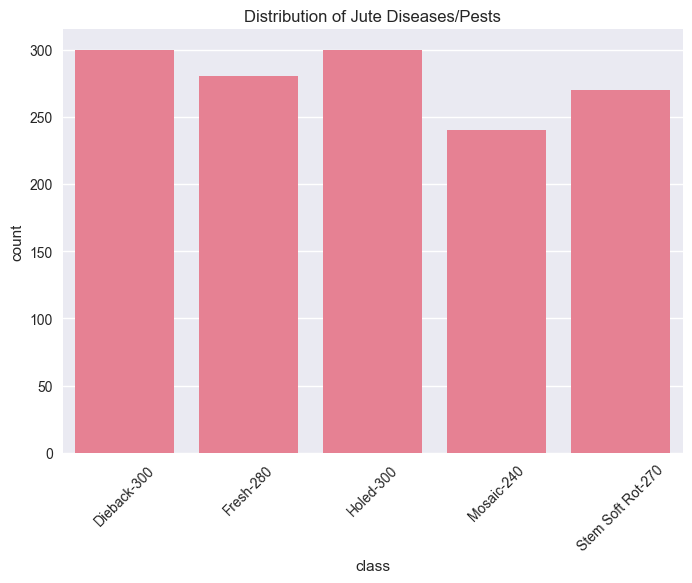

Scanning images...


100%|██████████| 1395/1395 [00:03<00:00, 396.17it/s]



--- Image Size Summary Statistics ---
        width  height
count  1390.0  1390.0
mean   1024.0  1024.0
std       0.0     0.0
min    1024.0  1024.0
25%    1024.0  1024.0
50%    1024.0  1024.0
75%    1024.0  1024.0
max    1024.0  1024.0


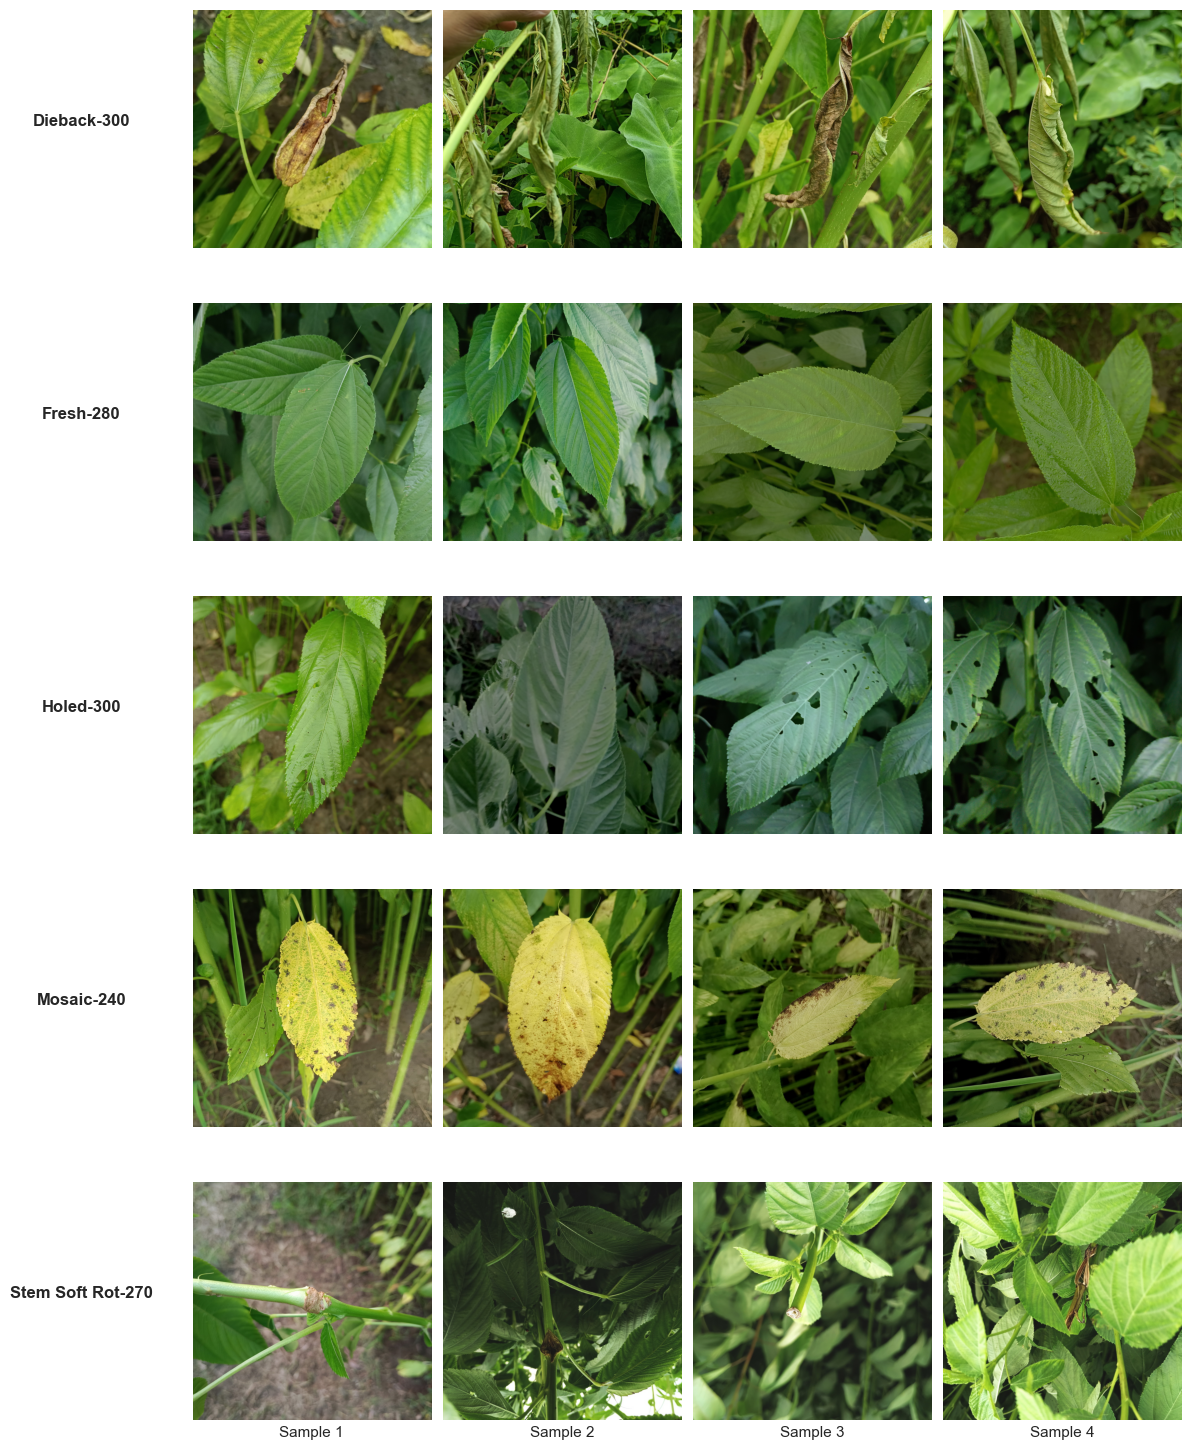

In [ ]:
EDA.get_class_distribution(data_path)


In [26]:
EDA.get_image_size_description(data_path)


Scanning images...


100%|██████████| 1395/1395 [00:48<00:00, 28.80it/s]



--- Image Size Summary Statistics ---
        width  height
count  1390.0  1390.0
mean   1024.0  1024.0
std       0.0     0.0
min    1024.0  1024.0
25%    1024.0  1024.0
50%    1024.0  1024.0
75%    1024.0  1024.0
max    1024.0  1024.0


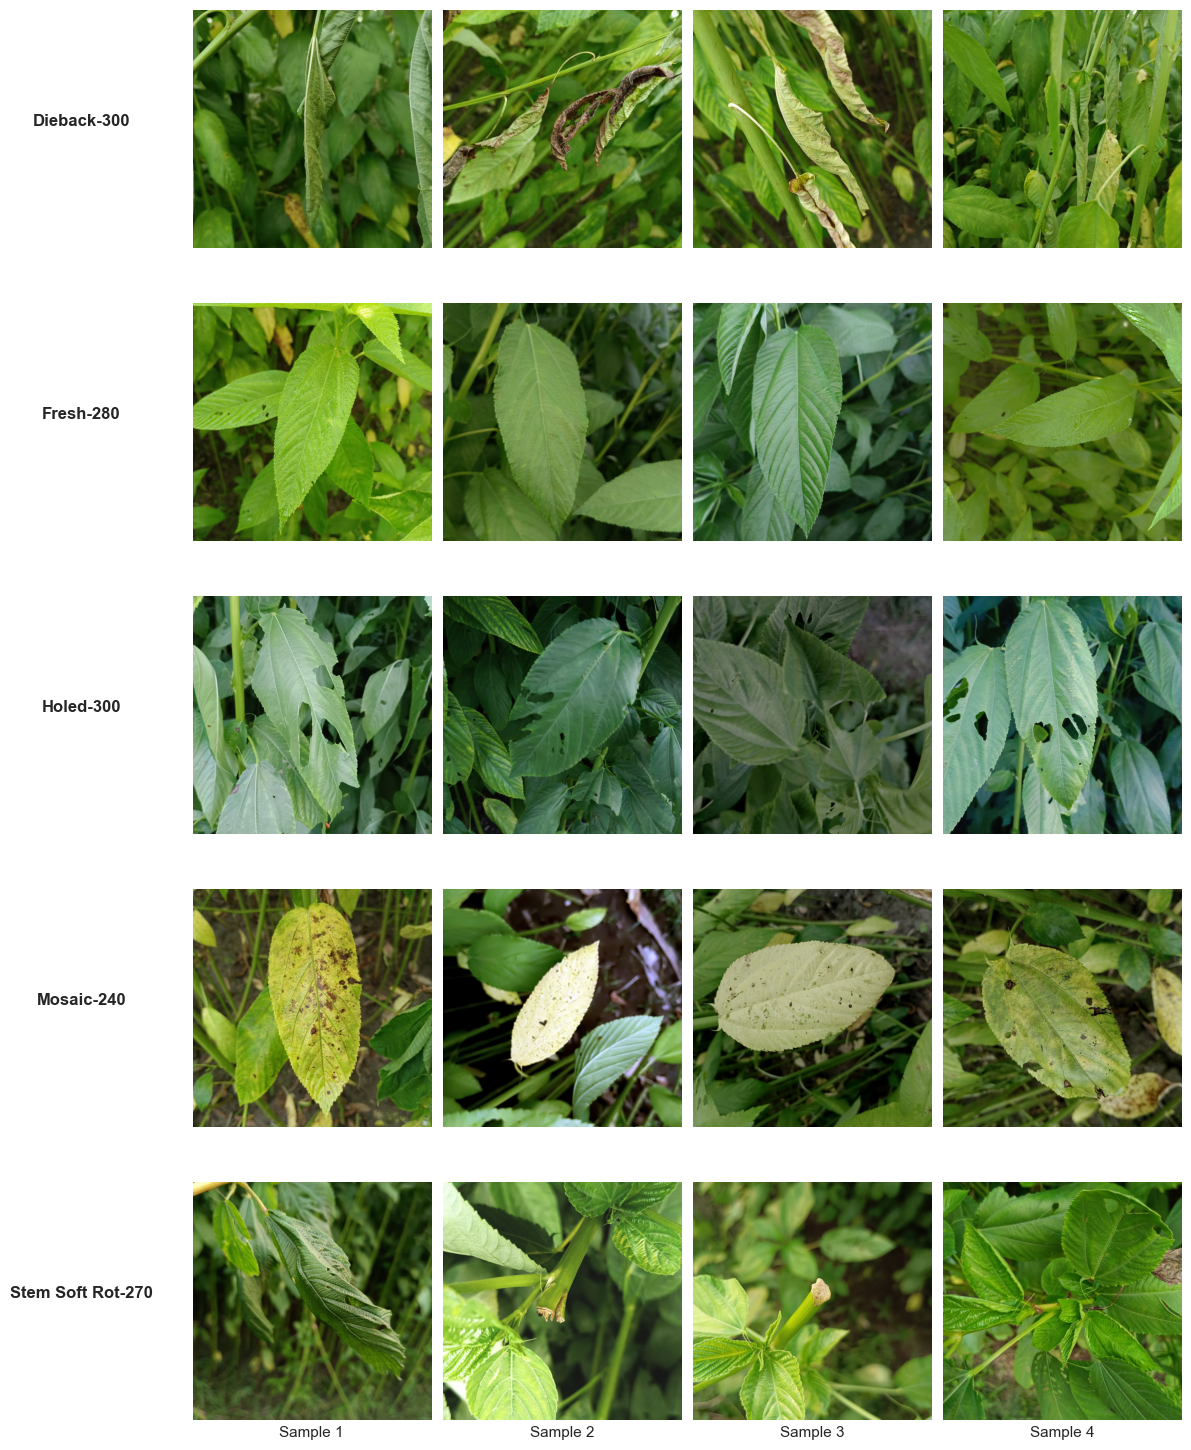

In [29]:
EDA.preview_class_samples(data_path, num_samples=4)